# Data Science in Finance mit Python - Final Case

### Michael Betz und Dennis Götz

**Aufgabenstellung für Bachelor- und Master-Studenten:**
1. Wählen Sie 15 Unternehmen aus, die bereits seit 1997 an der Börse gelistet sind. Bestimmen Sie für Ihre 15 Aktien die Portfolios mit der minimalen Varianz, dem minimalen VaR und der maximalen Sharpe Ratio. Nutzen Sie dafür Tagesdaten Ihrer 15 Aktien von 1997-2001.
2. Implementieren Sie Buy-and-Hold Strategien für Ihre drei Portfolios von 2002-2021 
auf Grundlage der errechneten Gewichte Ihrer 15 Aktien.
3. Diskutieren Sie die Performance Ihrer drei Portfolios.
4. Erstellen Sie eine Grafik für den Zeitraum 2002-2021, welche den Kursverlauf Ihrer 
drei Portfoliostrategien einem gleichgewichteten Portfolio aus den 15 Aktien als 
Benchmark gegenüberstellt.
5. Berechnen Sie die Portfolios mit der minimalen Varianz, dem minimalen VaR und der 
maximalen Sharpe Ratio nun für den Zeitraum von 2017-2021 und vergleichen Sie die 
Portfoliogewichte mit den Ihren.
6. Wie würden Sie die Implementierung Ihrer Portfoliostrategie noch verbessern? Was 
könnten Sie noch beachten?


Matrikelnummer: 272038

Name Teampartner: Betz Michael

In [1]:
# Import der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import scipy.optimize as sco
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

# 1. Portfolios mit min. Varianz, min. VaR und max. Sharpe Ratio (1997-2001)

Aufgabenstellung: Wählen Sie 15 Unternehmen aus, die bereits seit 1997 an der Börse gelistet sind. Bestimmen Sie für Ihre 15 Aktien die Portfolios mit der **minimalen Varianz**, dem **minimalen VaR** und der **maximalen Sharpe Ratio**. Nutzen Sie dafür Tagesdaten Ihrer 15 Aktien von 1997-2001.

In [2]:
# Preise der 15 Aktien von 1997/01/01 - 2021/12/31 laden
yf.pdr_override()
tickers = sorted(['AEP', 'AZN', 'BTI', 'DTE', 'DUK', 'DVN', 'ED', 'FCX', 'GIS', 'HRL', 'LMT', 'NVO', 'RELX', 'SO', 'XOM'])
start = '1997-01-01'
end = '2021-12-31'

Adj_Close = web.get_data_yahoo(tickers, start, end)['Adj Close']
Adj_Close = pd.DataFrame(Adj_Close)
Adj_Close.isna().sum().sum()

[*********************100%***********************]  15 of 15 completed


0

In [3]:
# Berechnung der Logrenditen (Vorteil der Additivität)
returns = pd.DataFrame(np.diff(np.log(Adj_Close).T).T)
returns.index = Adj_Close.index[1:]
returns.columns = tickers
returns

# Alternativ
#returns = pd.DataFrame(np.diff(np.log(Adj_Close.values).T).T)
#returns = np.log(Adj_Close/Adj_Close.shift(1))
#returns = np.log1p(Adj_Close.pct_change())

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM
Date,,,,,,,,,,,,,,,
1997-01-03,-0.006097,0.015106,0.011517,-0.003853,0.000000,0.003605,0.004320,0.004141,7.920939e-03,0.000000,0.002805,0.005540,0.000000,0.000000,0.002538
1997-01-06,-0.006135,0.000000,0.007604,-0.015565,-0.011019,0.014286,0.000000,-0.008298,3.936705e-03,0.000000,0.016667,0.008253,0.000000,0.011173,0.013845
1997-01-07,0.009188,0.002994,0.000000,0.011696,0.011019,0.024519,0.012848,-0.004176,1.945623e-02,0.000000,0.019101,0.008186,-0.033448,0.016530,0.002496
1997-01-08,0.000000,-0.012030,-0.007604,-0.007782,-0.005494,-0.003466,0.016878,-0.012631,-1.286479e-07,-0.014052,-0.037169,-0.013680,0.006779,-0.010989,-0.007509
1997-01-09,0.006079,0.006033,-0.007663,-0.007843,0.005494,0.040822,0.004175,-0.004247,9.662419e-03,0.014052,0.005594,0.000000,0.000000,0.000000,0.033357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.001155,-0.007605,0.000270,0.001028,-0.001844,-0.005691,-0.000955,0.024364,4.404217e-03,0.001466,0.011244,-0.013466,0.004087,-0.001652,0.000492
2021-12-27,0.006452,0.007260,-0.002160,0.008778,0.003103,0.059099,-0.000478,0.020694,1.060303e-03,0.004386,0.009351,0.029085,0.010922,0.006292,0.014157
2021-12-28,0.012893,0.004468,0.004585,0.007439,0.012316,-0.002469,0.007970,0.000000,1.248602e-02,0.009335,0.009858,-0.007644,0.003408,0.011434,-0.003237


Datensätze Adj Close und returns plotten; Verlauf der Assets über die Zeitreihe beobachten/beschreiben...

In [4]:
# DataFrame auf den Zeitraum des Kalibrationsdatensatzes von 1997/01/01 - 2001/12/31 begrenzen
insample = returns.loc['1997-01-01':'2001-12-31']
insample

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM
Date,,,,,,,,,,,,,,,
1997-01-03,-0.006097,0.015106,0.011517,-0.003853,0.000000,0.003605,0.004320,0.004141,7.920939e-03,0.000000,0.002805,0.005540,0.000000,0.000000,0.002538
1997-01-06,-0.006135,0.000000,0.007604,-0.015565,-0.011019,0.014286,0.000000,-0.008298,3.936705e-03,0.000000,0.016667,0.008253,0.000000,0.011173,0.013845
1997-01-07,0.009188,0.002994,0.000000,0.011696,0.011019,0.024519,0.012848,-0.004176,1.945623e-02,0.000000,0.019101,0.008186,-0.033448,0.016530,0.002496
1997-01-08,0.000000,-0.012030,-0.007604,-0.007782,-0.005494,-0.003466,0.016878,-0.012631,-1.286479e-07,-0.014052,-0.037169,-0.013680,0.006779,-0.010989,-0.007509
1997-01-09,0.006079,0.006033,-0.007663,-0.007843,0.005494,0.040822,0.004175,-0.004247,9.662419e-03,0.014052,0.005594,0.000000,0.000000,0.000000,0.033357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-12-24,0.017122,0.001109,0.008389,0.005334,0.017783,0.020230,0.010538,0.016661,-3.087391e-03,0.000000,0.004122,0.003552,-0.033746,0.017785,0.012904
2001-12-26,0.002323,-0.002220,0.009501,0.001450,0.001036,0.035362,0.020499,0.018706,1.210219e-02,-0.007025,-0.000649,0.037525,0.001559,0.015504,0.015267
2001-12-27,0.002549,-0.008928,0.007068,0.012956,0.021264,0.002869,0.003002,0.003854,9.313305e-03,0.002964,0.005186,-0.009804,0.045670,0.001970,0.004786


Berechnung der notwendigen Eingabeparameter für die anschließenden Funktionen

In [5]:
# Berechnung der Varianz-Covarianz-Matrix, mittleren Renditen und Festlegung von Alpha-Quantil, Zeithorizont und risikolosem Zins
insample_cov = insample.cov() #plot
insample_mean_returns = insample.mean()
alpha = 0.05
days = 252
rf = 0 #erklären

In [6]:
#insample_cov #plot
#insample_covariance = insample_cov
#for i in range(len(insample_covariance)):
#    insample_covariance.iloc[i,i] = 0
#np.sum(np.sum(insample_covariance))

**1.1 Bestimmung des Portfolios mit minimaler Varianz**

Wir entscheiden uns für die **Numerische Optimierung**, da diese genauer ist als die Monte-Carlo-Simulation, welche sich nur an das Miniumum/Maximum annähert.

**Funktion 1** berechnet die annualisierte Standardabweichung $𝜎=h^{T}Vh$ des Portfolios und übergibt diese an die Minimierungsfunktion in **Funktion 2**.

Die **Nebenbedingung** stellt sicher, dass die Summe der Gewichte im Portfolio gleich 1 ist.

In [7]:
# Funktion 1
def calc_portfolio_std(weights, cov):
    portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) * np.sqrt(252) #h=15x1 Matrix-> [h.transpose * cov] * h = [1x15 * 15x15] * 15x1 = 1x15 * 15x1 = 1x1
    return portfolio_std

# Funktion 2
def min_variance(cov):
    num_assets = len(cov)
    args = cov
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) #Nebenbedingung; ; eq für equality -> Gleichung != 0; np.sum(weights) - 1 = 0 (Summe der Gewichte müssen 1 ergeben und Gleichung muss gleich Null sein!)
    bound = (0.0, 1.0)
    bounds = tuple(bound for assets in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1/num_assets], args=args, 
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Ausführen der Funktionen
function_result = min_variance(insample_cov) #fun: gibt den ZF-wert (Min Varinaz) an & x: gibt die Gewichtungen der einzelnen Aktien im Portfolio an
function_result

     fun: 0.12889640960594684
     jac: array([0.1287885 , 0.12911134, 0.12894456, 0.12904569, 0.12885818,
       0.1290105 , 0.12920571, 0.1286914 , 0.12881896, 0.12874954,
       0.12888935, 0.12878889, 0.12900586, 0.12915801, 0.12835598])
 message: 'Optimization terminated successfully'
    nfev: 145
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.05597151, 0.06127285, 0.03180271, 0.09866619, 0.00331519,
       0.04878593, 0.03769052, 0.02940739, 0.23800155, 0.03544064,
       0.06182774, 0.08293648, 0.07787937, 0.07943711, 0.05756482])

In [8]:
# Ergebnisse der Optimierung in DataFrame abspeichern
insample_min_port_variance = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T #Gewichte auf 2 Nachkommastellen runden
insample_min_port_variance['Function Result'] = function_result['fun'] #Spalte für Zielfunktionswert
insample_min_port_variance

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM,Function Result
0,0.06,0.06,0.03,0.1,0.0,0.05,0.04,0.03,0.24,0.04,0.06,0.08,0.08,0.08,0.06,0.128896


**1.2 Bestimmung des Portfolios mit minimalem Value at Risk (VaR)**

**Funktion 1** berechnet die annualisierten Mean Returns 𝜇, die annualisierte Standardabweichung $𝜎=h^{T}Vh$ und den Value at Risk des Portfolios und gibt den VaR aus, damit dieser von der Minimierungsfunktion in **Funktion 2** minimiert werden kann.

In [9]:
# Funktion 1
def calc_portfolio_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(weights * mean_returns) * days #nur bei Logrenditen Addition möglich
    portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) * np.sqrt(days)
    portfolio_VaR = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha))) #Erklären
    return portfolio_VaR

# Funktion 2
def min_VaR(mean_returns, cov, alpha, days):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha ,days)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_VaR, num_assets*[1/num_assets], args=args, 
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Ausführen der Funktionen
function_result = min_VaR(insample_mean_returns, insample_cov, alpha, days)
#function_result

In [10]:
# Ergebnisse der Optimierung in DataFrame abspeichern
insample_min_port_VaR = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
insample_min_port_VaR['Function Result'] = function_result['fun']
insample_min_port_VaR

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM,Function Result
0,0.0,0.07,0.01,0.03,0.03,0.0,0.02,0.0,0.26,0.09,0.01,0.13,0.02,0.23,0.09,0.087836


**1.3 Bestimmung des Portfolios mit maximaler Sharpe Ratio (𝜇 - 𝜎 effizientes Portfolio)**
 
 

**Funktion 1** berechnet die annualisierten Mean Returns 𝜇, die annualisierte Standardabweichung $𝜎=h^{T}Vh$ und die Sharpe Ratio (𝜇 - rf) / 𝜎 des Portfolios und gibt die negative Sharpe Ratio aus, damit diese von der Minimierungsfunktion in **Funktion 2** maximiert werden kann.

In [11]:
# Funktion 1
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(weights * mean_returns) * 252
    portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio

# Funktion 2
def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1/num_assets], args=args, 
                          method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Ausführen der Funktionen
function_result = max_sharpe_ratio(insample_mean_returns, insample_cov, rf)
#function_result

In [12]:
# Ergebnisse der Optimierung in DataFrame abspeichern
insample_max_port_SharpeRatio = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
insample_max_port_SharpeRatio['Function Result'] = -function_result['fun'] #hier Vorzeichen wieder umkehren!
insample_max_port_SharpeRatio

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM,Function Result
0,0.0,0.07,0.0,0.0,0.03,0.0,0.0,0.0,0.25,0.11,0.0,0.16,0.0,0.3,0.08,1.036588


**1.4 Vergleich der Gewichtungen der drei Strategien**

In [13]:
# Zusammenfassung der Portfolios in einem DataFrame
insample_portfolios = pd.concat([insample_min_port_variance, insample_min_port_VaR, insample_max_port_SharpeRatio], axis=0)
insample_portfolios.index = ['Min Variance', 'Min VaR', 'Max Sharpe Ratio']
insample_portfolios

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM,Function Result
Min Variance,0.06,0.06,0.03,0.10,0.00,0.05,0.04,0.03,0.24,0.04,0.06,0.08,0.08,0.08,0.06,0.128896
Min VaR,0.00,0.07,0.01,0.03,0.03,0.00,0.02,0.00,0.26,0.09,0.01,0.13,0.02,0.23,0.09,0.087836
Max Sharpe Ratio,0.00,0.07,0.00,0.00,0.03,0.00,0.00,0.00,0.25,0.11,0.00,0.16,0.00,0.30,0.08,1.036588


In [14]:
# Dataframe nur mit Gewichtungen der Aktien
insample_weights = insample_portfolios.drop(['Function Result'], axis=1)
insample_weights

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM
Min Variance,0.06,0.06,0.03,0.10,0.00,0.05,0.04,0.03,0.24,0.04,0.06,0.08,0.08,0.08,0.06
Min VaR,0.00,0.07,0.01,0.03,0.03,0.00,0.02,0.00,0.26,0.09,0.01,0.13,0.02,0.23,0.09
Max Sharpe Ratio,0.00,0.07,0.00,0.00,0.03,0.00,0.00,0.00,0.25,0.11,0.00,0.16,0.00,0.30,0.08


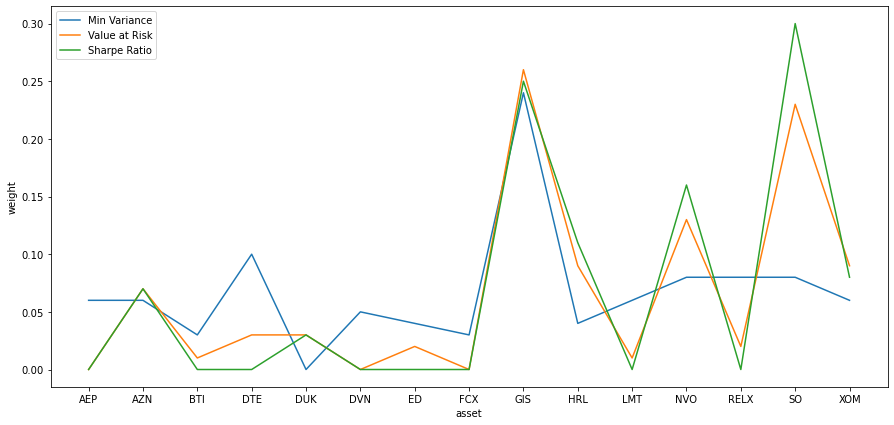

In [15]:
# 1997-2001
plt.figure(figsize=(15,7))
plt.plot(insample_weights.iloc[0].T, label='Min Variance')
plt.plot(insample_weights.iloc[1].T, label='Value at Risk')
plt.plot(insample_weights.iloc[2].T, label='Sharpe Ratio')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

Beschreibung der Gewichtungen; Unterschiede & Ähnlichkeiten; ZF-Werte...

Min VaR und Max Sharpe Ratio ähnliche Gewichtungen

# 2. Buy-and-Hold Strategien (2002-2021)

Aufgabenstellung: Implementieren Sie Buy-and-Hold Strategien für Ihre drei Portfolios von 2002-2021 
auf Grundlage der errechneten Gewichte Ihrer 15 Aktien. 

In [16]:
# DataFrame auf den Zeitraum des Testdatensatzes von 2002/01/01 - 2021/12/31 begrenzen
outsample = returns.loc['2002-01-01':'2021-12-31']
outsample

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM
Date,,,,,,,,,,,,,,,
2002-01-02,0.009602,-0.016661,0.000000,0.010200,0.013661,-0.011711,0.010353,-0.008249,-0.020591,-0.008221,-0.009256,0.000000,-0.007535,0.005900,0.007605
2002-01-03,-0.007079,-0.001748,-0.006492,-0.005443,-0.011371,-0.020898,0.002938,-0.007559,0.000392,0.003746,0.007111,-0.032183,-0.013710,-0.014218,0.001514
2002-01-04,-0.008514,-0.014753,-0.014311,-0.008341,-0.021838,0.018539,-0.000733,0.005297,-0.017017,-0.002246,0.014708,-0.017667,0.050833,-0.013213,0.008536
2002-01-07,0.015593,-0.007347,-0.012693,-0.007445,0.016232,0.026157,0.003663,0.037041,-0.015283,-0.005259,-0.005942,-0.013459,-0.008785,-0.001210,-0.008788
2002-01-08,-0.002278,-0.011462,-0.002436,-0.019230,-0.020657,-0.014677,-0.008323,-0.029522,0.005386,0.005634,0.014161,-0.009074,0.002937,-0.003638,0.001260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.001155,-0.007605,0.000270,0.001028,-0.001844,-0.005691,-0.000955,0.024364,0.004404,0.001466,0.011244,-0.013466,0.004087,-0.001652,0.000492
2021-12-27,0.006452,0.007260,-0.002160,0.008778,0.003103,0.059099,-0.000478,0.020694,0.001060,0.004386,0.009351,0.029085,0.010922,0.006292,0.014157
2021-12-28,0.012893,0.004468,0.004585,0.007439,0.012316,-0.002469,0.007970,0.000000,0.012486,0.009335,0.009858,-0.007644,0.003408,0.011434,-0.003237


# bearbeitet

In [17]:
# BaH-Strategie mit minimum Variance Portfolio
BaH_min_variance = insample_weights.iloc[0] * outsample #Array mit Gewichtungen * Outsample Datensatz
BaH_min_variance['Strategy'] = np.sum(BaH_min_variance, axis=1)
BaH_min_variance['Strategy Equity'] = BaH_min_variance['Strategy'].cumsum() + 1

# BaH-Strategie mit minimun VaR Portfolio
BaH_min_VaR = insample_weights.iloc[1] * outsample
BaH_min_VaR['Strategy'] = np.sum(BaH_min_VaR, axis=1)
BaH_min_VaR['Strategy Equity'] = BaH_min_VaR['Strategy'].cumsum() + 1

# BaH-Strategie mit maximum Sharpe Ratio Portfolio
BaH_max_SharpeRatio = insample_weights.iloc[2] * outsample
BaH_max_SharpeRatio['Strategy'] = np.sum(BaH_max_SharpeRatio, axis=1)
BaH_max_SharpeRatio['Strategy Equity'] = BaH_max_SharpeRatio['Strategy'].cumsum() + 1

In [18]:
#BaH_min_variance
#BaH_min_VaR
#BaH_max_SharpeRatio

# 3. Diskussion der Portfolio-Performances 

Aufgabenstellung: Diskutieren Sie die Performance Ihrer drei Portfolios.

# bearbeitet

In [19]:
# Kumulierte und Annualisierte Returns der Strategien berechnen
BaH_returns = pd.DataFrame(columns = ['Port Min Variance', 'Port Min VaR', 'Port Max Sharpe Ratio'], index=['Returns'])
BaH_returns.loc['Returns'] = [np.sum(insample_weights.iloc[i] * outsample, axis=1).cumsum()[-1] + 1 for i in range(len(insample_weights))]
BaH_returns.loc['Annual Returns'] = [np.sum(insample_weights.iloc[i] * outsample, axis=1).mean() * 252 for i in range(len(insample_weights))]
BaH_returns

,Port Min Variance,Port Min VaR,Port Max Sharpe Ratio
Returns,2.951664,2.974308,3.056484
Annual Returns,0.09768,0.098813,0.102926


# bearbeitet

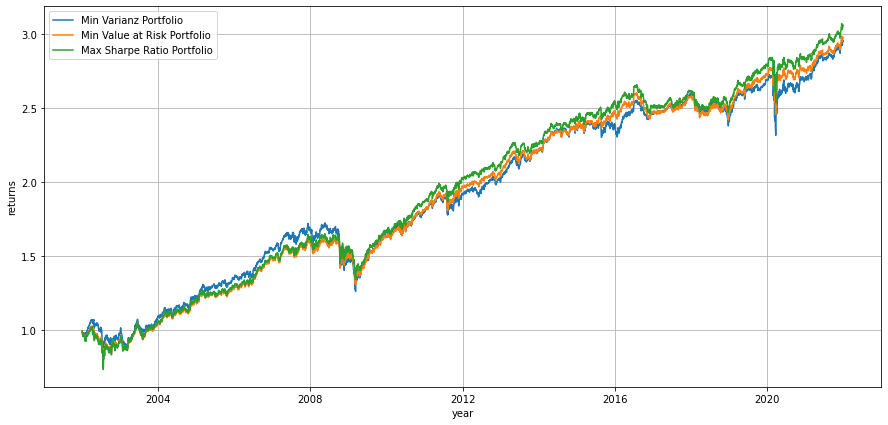

In [20]:
# Plot Strategy Equity
plt.figure(figsize=(15,7))
plt.plot(BaH_min_variance['Strategy Equity'], label = 'Min Varianz Portfolio')
plt.plot(BaH_min_VaR['Strategy Equity'], label = 'Min Value at Risk Portfolio')
plt.plot(BaH_max_SharpeRatio['Strategy Equity'], label = 'Max Sharpe Ratio Portfolio')
plt.xlabel('year')
plt.ylabel('returns')
plt.grid()
plt.legend();

**Diskussion:**
- Beste Strategie
- langfrisitger Trend
- Finanzkrise 2008 und Corona Krise 2020 erkennbar
- welche Strategie am besten in Krisen?
- Vergleich zur Benchmark

- Min Variance in Krisenzeiten stärker (Risikominimierung!), aber in den Wachstumsphasen Min VaR und Max Sharpe Ratio besser

# 4. Vergleich der Strategien mit einem gleichgewichteten Portfolio und Grafische Darstellung der Strategien (2002-2021)

Aufgabenstellung: Erstellen Sie eine Grafik für den Zeitraum 2002-2021, welche den Kursverlauf Ihrer 
drei Portfoliostrategien einem gleichgewichteten Portfolio aus den 15 Aktien als 
Benchmark gegenüberstellt.

# bearbeitet

In [21]:
# Erstellen der BaH-Strategie mit einem gleichgewichteten Portfolio
BaH_eq_weights = (1/len(tickers)) * outsample
BaH_eq_weights['Strategy'] = np.sum(BaH_eq_weights, axis=1)
BaH_eq_weights['Strategy Equity'] = BaH_eq_weights['Strategy'].cumsum() + 1

# Return des gleichgewichteten Portfolios
print("Der kumulierte Return des gleichgewichteten Portfolios liegt bei: %s" % (np.round(BaH_eq_weights['Strategy Equity'][-1], 2))) #letzter Wert Spalte Strategy Equity
print("Der annualisierte Return des gleichgewichteten Portfolios liegt bei: %s p.a." % (np.round(BaH_eq_weights['Strategy'].mean() * 252, 4)))

Der kumulierte Return des gleichgewichteten Portfolios liegt bei: 2.95
Der annualisierte Return des gleichgewichteten Portfolios liegt bei: 0.0978 p.a.


In [22]:
BaH_eq_weights

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM,Strategy,Strategy Equity
Date,,,,,,,,,,,,,,,,,
2002-01-02,0.000640,-0.001111,0.000000,0.000680,0.000911,-0.000781,0.000690,-0.000550,-0.001373,-0.000548,-0.000617,0.000000,-0.000502,0.000393,0.000507,-0.001660,0.998340
2002-01-03,-0.000472,-0.000117,-0.000433,-0.000363,-0.000758,-0.001393,0.000196,-0.000504,0.000026,0.000250,0.000474,-0.002146,-0.000914,-0.000948,0.000101,-0.007000,0.991340
2002-01-04,-0.000568,-0.000984,-0.000954,-0.000556,-0.001456,0.001236,-0.000049,0.000353,-0.001134,-0.000150,0.000981,-0.001178,0.003389,-0.000881,0.000569,-0.001381,0.989958
2002-01-07,0.001040,-0.000490,-0.000846,-0.000496,0.001082,0.001744,0.000244,0.002469,-0.001019,-0.000351,-0.000396,-0.000897,-0.000586,-0.000081,-0.000586,0.000832,0.990790
2002-01-08,-0.000152,-0.000764,-0.000162,-0.001282,-0.001377,-0.000978,-0.000555,-0.001968,0.000359,0.000376,0.000944,-0.000605,0.000196,-0.000243,0.000084,-0.006128,0.984662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.000077,-0.000507,0.000018,0.000069,-0.000123,-0.000379,-0.000064,0.001624,0.000294,0.000098,0.000750,-0.000898,0.000272,-0.000110,0.000033,0.000999,2.935420
2021-12-27,0.000430,0.000484,-0.000144,0.000585,0.000207,0.003940,-0.000032,0.001380,0.000071,0.000292,0.000623,0.001939,0.000728,0.000419,0.000944,0.011867,2.947286
2021-12-28,0.000860,0.000298,0.000306,0.000496,0.000821,-0.000165,0.000531,0.000000,0.000832,0.000622,0.000657,-0.000510,0.000227,0.000762,-0.000216,0.005523,2.952809


# bearbeitet

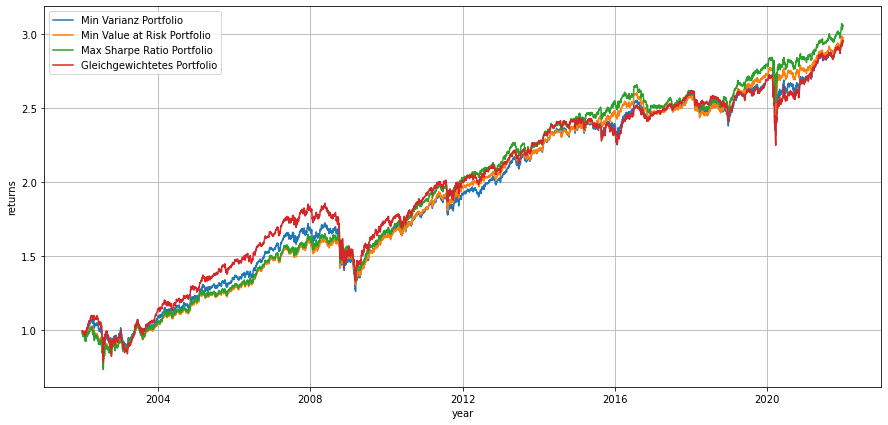

In [23]:
plt.figure(figsize=(15,7))
plt.plot(BaH_min_variance['Strategy Equity'], label = 'Min Varianz Portfolio')
plt.plot(BaH_min_VaR['Strategy Equity'], label = 'Min Value at Risk Portfolio')
plt.plot(BaH_max_SharpeRatio['Strategy Equity'], label = 'Max Sharpe Ratio Portfolio')
plt.plot(BaH_eq_weights['Strategy Equity'], label = 'Gleichgewichtetes Portfolio')
plt.xlabel('year')
plt.ylabel('returns')
plt.grid()
plt.legend();

**Diskussion:**
- Strategien oder Benchmark besser?
- langfrisitger Trend
- Finanzkrise 2008 und Corona Krise 2020

# 5. Portfolios mit min. Varianz, min. VaR und max. Sharpe Ratio (2017-2021)

Aufgabenstellung: Berechnen Sie die Portfolios mit der minimalen Varianz, dem minimalen VaR und der 
maximalen Sharpe Ratio nun für den Zeitraum von 2017-2021 und vergleichen Sie die 
Portfoliogewichte mit den Ihren.

In [24]:
# Testdatensatz auf den gekürzten Zeitraum von 2017/01/01 - 2021/12/31 begrenzen
outsample_shorted = outsample.loc['2017-01-01':'2021-12-31']
#outsample_shorted

In [25]:
# Berechnung der Varianz-Covarianz-Matrix und mitteleren Renditen; alpha-Quantil, Zeithorizont und risikoloser Zins wie vorher (siehe 1.2 & 1.3)
outsample_shorted_cov = outsample_shorted.cov()
outsample_shorted_mean_returns = outsample_shorted.mean()

**5.1 Bestimmung des Portfolios mit minimaler Varianz**

In [26]:
# Ausführen der Funktionen aus Kapitel 1.1
function_result = min_variance(outsample_shorted_cov)
#function_result

In [27]:
# Ergebnisse der Optimierung in DataFrame abspeichern
outsample_shorted_min_port_variance = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
outsample_shorted_min_port_variance['Function Result'] = function_result['fun']
outsample_shorted_min_port_variance

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM,Function Result
0,0.15,0.1,0.04,0.0,0.0,0.0,0.0,0.0,0.14,0.19,0.03,0.13,0.16,0.0,0.06,0.148772


**5.2 Bestimmung des Portfolios mit minimalem Value at Risk (VaR)**

In [28]:
# Ausführen der Funktionen aus Kapitel 1.2
function_result = min_VaR(outsample_shorted_mean_returns, outsample_shorted_cov, alpha, days)
#function_result

In [29]:
# Ergebnisse der Optimierung in DataFrame abspeichern
outsample_shorted_min_port_VaR = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
outsample_shorted_min_port_VaR['Function Result'] = function_result['fun']
outsample_shorted_min_port_VaR

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM,Function Result
0,0.15,0.15,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.17,0.0,0.36,0.13,0.0,0.0,0.09501


**5.3 Bestimmung des Portfolios mit maximaler Sharpe Ratio (𝜇 - 𝜎 effizientes Portfolio)**

In [30]:
# Ausführen der Funktionen aus Kapitel 1.3
function_result = max_sharpe_ratio(outsample_shorted_mean_returns, outsample_shorted_cov, rf)
#function_result

In [31]:
# Ergebnisse der Optimierung in DataFrame abspeichern
outsample_shorted_max_port_SharpeRatio = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
outsample_shorted_max_port_SharpeRatio['Function Result'] = -function_result['fun']
outsample_shorted_max_port_SharpeRatio

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM,Function Result
0,0.1,0.17,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.09,0.0,0.51,0.07,0.0,0.0,1.09264


**5.4 Vergleich der Gewichtungen der drei Strategien von 1997-2001 und 2017-2021**

In [32]:
# Zusammenfassung der Portfolios in einem DataFrame
outsample_portfolios = pd.concat([outsample_shorted_min_port_variance, outsample_shorted_min_port_VaR, outsample_shorted_max_port_SharpeRatio], axis=0)
outsample_portfolios.index = ['Min Variance', 'Min VaR', 'Max Sharpe Ratio']

# Gegenüberstellung der Gewichtungen (nachher - vorher)
outsample_portfolios - insample_portfolios

,AEP,AZN,BTI,DTE,DUK,DVN,ED,FCX,GIS,HRL,LMT,NVO,RELX,SO,XOM,Function Result
Min Variance,0.09,0.04,0.01,-0.10,0.00,-0.05,-0.04,-0.03,-0.10,0.15,-0.03,0.05,0.08,-0.08,0.00,0.019875
Min VaR,0.15,0.08,-0.01,-0.03,-0.03,0.00,-0.02,0.04,-0.26,0.08,-0.01,0.23,0.11,-0.23,-0.09,0.007174
Max Sharpe Ratio,0.10,0.10,0.00,0.00,-0.03,0.00,0.00,0.07,-0.25,-0.02,0.00,0.35,0.07,-0.30,-0.08,0.056051


Veränderungen in den Funktionsergebnissen: ...

In [33]:
# Dataframe nur mit Gewichtungen der Aktien
outsample_weights = outsample_portfolios.drop(['Function Result'], axis=1)
#outsample_weights

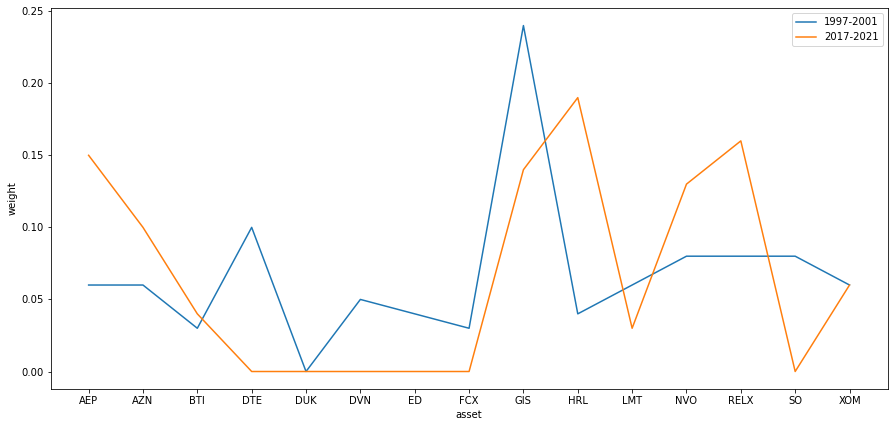

In [34]:
# Min Varinaz
plt.figure(figsize=(15,7))
plt.plot(insample_weights.iloc[0].T, label='1997-2001')
plt.plot(outsample_weights.iloc[0].T, label='2017-2021')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

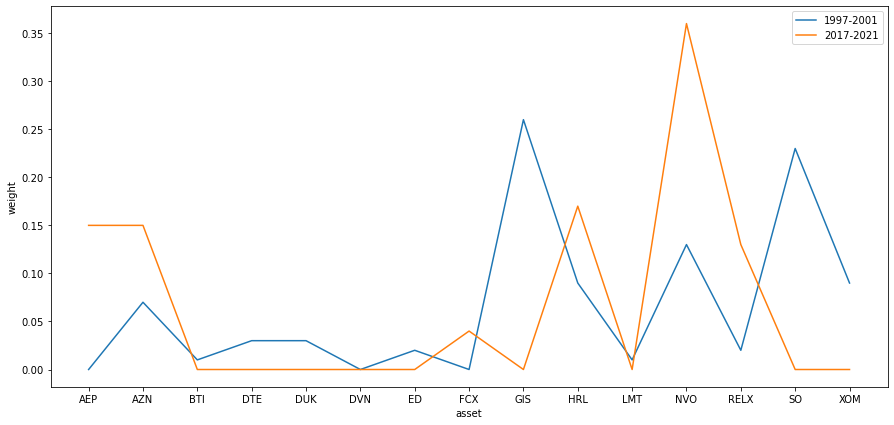

In [35]:
# Min Value at Risk
plt.figure(figsize=(15,7))
plt.plot(insample_weights.iloc[1].T, label='1997-2001')
plt.plot(outsample_weights.iloc[1].T, label='2017-2021')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

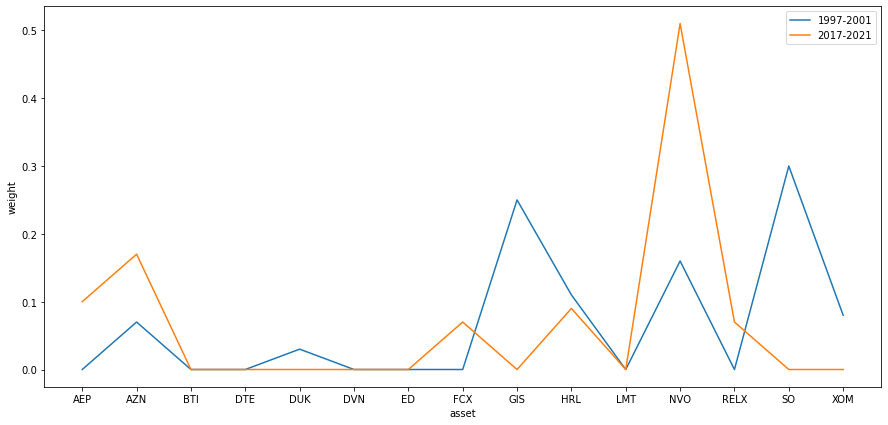

In [36]:
# Max Sharpe Ratio
plt.figure(figsize=(15,7))
plt.plot(insample_weights.iloc[2].T, label='1997-2001')
plt.plot(outsample_weights.iloc[2].T, label='2017-2021')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

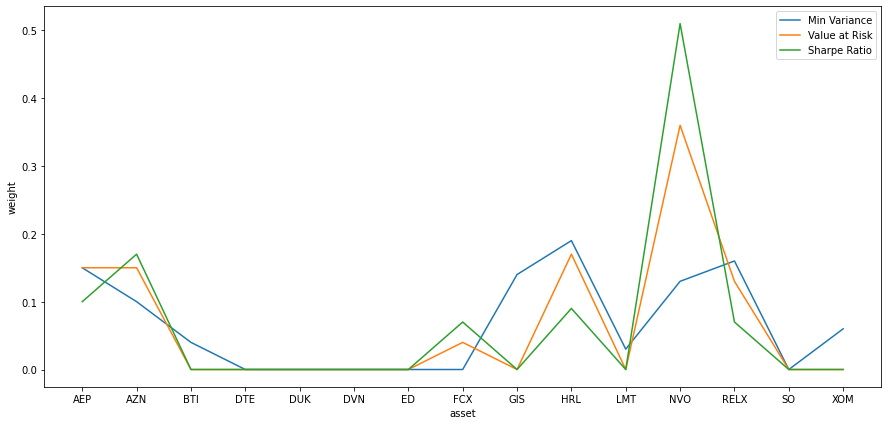

In [37]:
# 2017-2021
plt.figure(figsize=(15,7))
plt.plot(outsample_weights.iloc[0].T, label='Min Variance')
plt.plot(outsample_weights.iloc[1].T, label='Value at Risk')
plt.plot(outsample_weights.iloc[2].T, label='Sharpe Ratio')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

Veränderungen in den Gewichtungen je Strategie: ...

# 6 Verbesserungsmöglichkeiten der Strategien

Aufgabenstellung: Wie würden Sie die Implementierung Ihrer Portfoliostrategie noch verbessern? Was 
könnten Sie noch beachten?

- verschiedene Asset-Klassen (Assets mit minimaler Covarianz - am besten Null)
- Aus 30 Assets die 15 mit den geringsten Covarianzen auswählen
- anderes alpha-Quantil bei min VaR-Strategie
- Benchmark einführen (z.B. S&P500) - Gleichgewichtetes Portfolio bereits als Benchmark
- Semivarianz bzw. Downside-Risk anstelle der Standardabweichung (evtl hier ausführen)
- Sortino-Ratio anstelle Sharpe 
Ratio (evtl hier ausführen)
- Für kurze Prognosehorizonte Mean Reversion (evtl hier ausführen) oder für lange Prognosehorizonte Moving Average
  Crossover (Master-Aufgabe) anstelle einer Buy-and-Hold-Strategie
- Rebalancing der Portfoliogewichte (sonst zu starke Abweichung der realen Gewichte von den optimalen Gewichten)
- 𝜇 und 𝜎 nicht auf Basis historischer Daten schätzen

Vereinfachende Annahmen
- Risikolosen Zins beachten
- keine Standardnormalverteilung bei Value at Risk

# MA-Alternative 1:
# 7.1 Momentum-Strategie

Aufgabenstellung MA-Alternative 1: Entwickeln Sie für Ihre 15 Aktien eine Momentum Strategie auf Monatsebene. Diese ist wie folgt aufgebaut: Sie investieren in das Terzil der Unternehmen mit der 
höchsten Rendite des Vormonats. Diese 5 Unternehmen halten Sie bis zum Ende des darauffolgenden Monats. Zum Monatsende erfolgt somit immer eine Portfolioumschichtung, wobei die 
Unternehmen mit der höchsten Rendite im vergangen Monat gekauft werden. Funktioniert 
diese Strategie? Beurteilen Sie die Performance.

In [38]:
# Monatliche Logreturns berechnen
monthly_returns = returns.resample('M').sum()

In [39]:
# helper functions
def monthly_weights(monthly_returns):
    empty_list = list()
    for i in range(len(monthly_returns.iloc[3:])): #ersten optimalen Gewichte am Ende des 4. Monats (hier: April)
        # Top5 Aktien mit den höchsten Returns im aktuellen Monat bestimmen
        current_month_returns = np.array(monthly_returns.iloc[i+3]) #erster Wert Ende April
        sort_index = np.argsort(current_month_returns)
        locations = sort_index[-5:].tolist()
        tickers_top5 = [tickers[i] for i in locations]
        # Returns DF auf die letzten vier Monate und die Top5 Aktien zuschneiden sowie die entsprechende Cov-Matrix berechnen
        monthly_top5_returns = returns[tickers_top5].loc[str(monthly_returns.index.tolist()[i])[0:10]:str(monthly_returns.index.tolist()[i+3])[0:10]]
        monthly_top5_mean_returns = monthly_top5_returns.mean()
        monthly_top5_cov = monthly_top5_returns.cov()
        # Funktion zur Bestimmung des Portfolios mit maximaler Sharpe Ratio ausführen auf Basisi der letzten 4 Monate (window ca. 120 Tage)
        weights_top5 = max_sharpe_ratio(monthly_top5_mean_returns, monthly_top5_cov, rf).x #(Fkt. aus Kapitel 1.3)
        # Array mit 15 Gewichten erstellen; die optimalen Gewichte der monatl. Top5 hinzufügen und Array an Liste anhängen
        weights = np.zeros(len(tickers))
        weights[locations] = weights_top5
        empty_list.append(weights)
    # DataFrame mit den monatlichen Gewichten beginnend nach 2 Monaten erstellen
    weights_df = pd.DataFrame(empty_list, columns=tickers)
    weights_df.index = monthly_returns.index[3:] #Index beginnt ab dem 4. Monat
    return weights_df

# monthly sharpe ratio
monthly_sr = lambda x: x.mean() / x.std()

# Strategy (main function)
def momentum_strategy(monthly_returns):
    # helper function monthly_weights ausführen und als DataFrame abspeichern
    monthly_weights_df = monthly_weights(monthly_returns)
    # DataFrame monthly_returns einen Monat nach DataFrame monthly_weights beginnen lassen
    monthly_returns = monthly_returns.iloc[5:] #erster Return im 6. Monat (Juni) mit den Gewichten aus 4. & 5. Monat (April, Mai)
    # DataFrame für Returns und Sharpe Ratio erstellen
    empty_list = list()
    # Monatiliche Returns mit den halbierten Gewichten der Top5 Aktien vom letzten und vorletzten Monat multiplizieren
    for i in range(len(monthly_returns)):
        weighted_current_month_returns = monthly_returns.iloc[i] * (monthly_weights_df.iloc[i] + monthly_weights_df.iloc[i+1]) / 2
        empty_list.append(weighted_current_month_returns)
    # DataFrame mit den monatlichen gewichteten Returns pro Aktie erstellen
    momentum_strategy_returns = pd.DataFrame(empty_list, columns=tickers)
    momentum_strategy_returns.index = monthly_returns.index
    # Erstellen der Spalten 'Strategy' und 'Strategy Equity' und Berechnung der Sharpe Ratio
    momentum_strategy_returns['Strategy'] = np.sum(momentum_strategy_returns, axis=1)
    momentum_strategy_returns['Strategy Equity'] = momentum_strategy_returns['Strategy'].cumsum() + 1
    ann_sharpe_ratio = monthly_sr(momentum_strategy_returns['Strategy']) * np.sqrt(12)
    return ann_sharpe_ratio, momentum_strategy_returns

momentum_strategy_sr, momentum_strategy_returns = momentum_strategy(monthly_returns)

Die Sharpe Ratio der Momentum Strategie liegt bei 0.75 p.a.
Der kumulierte Return der Momentum Strategie liegt bei 3.96
Der annualisierte Return der Momentum Strategie liegt bei 0.12 p.a.


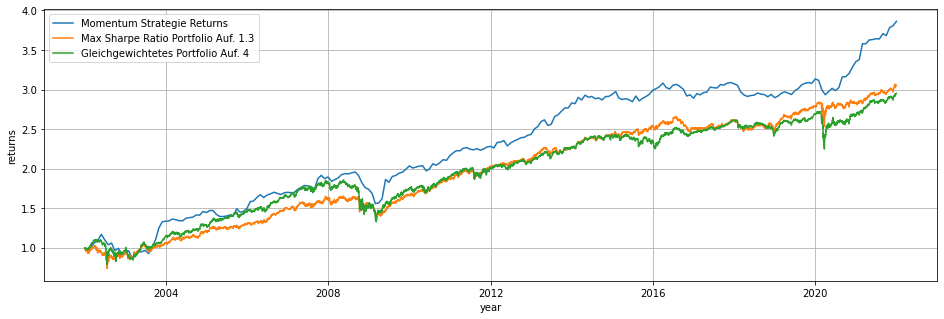

In [40]:
# Ausgabe der annualisierten Sharpe Ratio, kumulierten Returns und annualisierten Returns
print("Die Sharpe Ratio der Momentum Strategie liegt bei %s p.a." % (np.round(momentum_strategy_sr,2)))
print("Der kumulierte Return der Momentum Strategie liegt bei %s" % (np.round(momentum_strategy_returns['Strategy Equity'][-1],2)))
print("Der annualisierte Return der Momentum Strategie liegt bei %s p.a." % (np.round(momentum_strategy_returns['Strategy'].mean() * 12,2)))

# Vergleich der Returns der Momentum Strategie, Max Sharpe Ratio (Auf. 1) und gleichgewichtetes Portfolio (Auf. 4)
plt.figure(figsize=(16,5))
plt.plot(momentum_strategy_returns['Strategy'].loc['2002-01-01':].cumsum()+1,  label='Momentum Strategie Returns')
plt.plot(BaH_max_SharpeRatio['Strategy Equity'], label='Max Sharpe Ratio Portfolio Auf. 1.3')
plt.plot(BaH_eq_weights['Strategy Equity'], label='Gleichgewichtetes Portfolio Auf. 4')
plt.xlabel('year')
plt.ylabel('returns')
plt.grid()
plt.legend();

Die Strategie basiert auf Momentum (past winner = future winner) unter der Annahme, dass der letzte Monat Prognosekraft für nächsten zwei Monate besitzt. Das implementierte Rebalancing verhindert eine zu große Differenz zwischen realen und optimalen Gewichtungen, verursacht jedoch regelmäßige Transaktionskosten, wodurch Brutto Renditen entstehen. Durch die monatliche Frequenz des Rebalancing sind die Transaktionskosten allerdings annaéhmbar.

Im Vergleich zum besten Portfolio (max Sharpe Ratio) der BaH-Strategien aus Aufgabe 2 und dem gleichgewichteten Portfolio über denselben Zeitraum, schneidet die Momentum Strategie brutto deutlich besser ab. Nicht verwunderlich ist hierbei, dass es die BaH-Strategien besonders in anhaltenden steigenden Trends outperformt, da sie auf Momentum setzt. Auch während der Corona Krise scheint die Strategie deutlich besser zu performen und kann insobesondere von einen starken Aufstieg danach profitieren.

Mit den niedrigen Werten der annualisierten Sharpe Ratio und des annualisierten Returns ist diese Strategie dennoch nicht zu empfehlen.

### Zum Abschluss noch einige Performanceindikatoren der Momentum Strategie:

In [41]:
#create columns that indicate whether each days return was positive, 
#negative or flat.
momentum_strategy_returns['win'] = (np.where(momentum_strategy_returns['Strategy'] > 0, 1,0)) 
momentum_strategy_returns['loss'] = (np.where(momentum_strategy_returns['Strategy'] < 0, 1,0)) 
momentum_strategy_returns['scratch'] = (np.where(momentum_strategy_returns['Strategy'] == 0, 1,0)) 

#create columns with a cumulative sum of each of the columns created above 
momentum_strategy_returns['wincum'] = (np.where(momentum_strategy_returns['Strategy'] > 0, 1,0)).cumsum() 
momentum_strategy_returns['losscum'] = (np.where(momentum_strategy_returns['Strategy'] < 0, 1,0)).cumsum() 
momentum_strategy_returns['scratchcum'] = (np.where(momentum_strategy_returns['Strategy'] == 0, 1,0)).cumsum() 

#create a column that holds a running sum of trading days - 
#we will use this to create our percentages later
momentum_strategy_returns['days'] = (momentum_strategy_returns['wincum'] + momentum_strategy_returns['losscum'] + momentum_strategy_returns['scratchcum'])

#create columns that show the 12 month rolling sum of the 
#winning/losing/flat days 
momentum_strategy_returns['rollwin'] = momentum_strategy_returns['win'].rolling(window=12).sum() 
momentum_strategy_returns['rollloss'] = momentum_strategy_returns['loss'].rolling(window=252).sum() 
momentum_strategy_returns['rollscratch'] = momentum_strategy_returns['scratch'].rolling(window=252).sum() 

#create columns with hit ratio and loss ratio data 
momentum_strategy_returns['hitratio'] = momentum_strategy_returns['wincum'] / (momentum_strategy_returns['wincum']+momentum_strategy_returns['losscum']) 
momentum_strategy_returns['lossratio'] = 1 - momentum_strategy_returns['hitratio'] 

#
#create columns with rolling 12 month hit ratio and loss ratio data
momentum_strategy_returns['rollhitratio'] = momentum_strategy_returns['hitratio'].rolling(window=12).mean()
momentum_strategy_returns['rolllossratio'] = 1 - momentum_strategy_returns['rollhitratio'] 

#create column with rolling 12 month return 
momentum_strategy_returns['roll12mret'] = momentum_strategy_returns['Strategy'].rolling(window=12).sum()

#create column with average win, average loss and average daily return data 
momentum_strategy_returns['averagewin'] = momentum_strategy_returns['Strategy'][(momentum_strategy_returns['Strategy'] > 0)].mean() 
momentum_strategy_returns['averageloss'] = momentum_strategy_returns['Strategy'][(momentum_strategy_returns['Strategy'] < 0)].mean() 
momentum_strategy_returns['averagedailyret'] = momentum_strategy_returns['Strategy'].mean() 

#create column with rolling 1 year daily standard deviation and 
#rolling 1 year annualised standard deviation
momentum_strategy_returns['roll12mstdev'] = momentum_strategy_returns['Strategy'].rolling(window=12).std()
momentum_strategy_returns['roll12mannualisedvol'] = momentum_strategy_returns['roll12mstdev'] * np.sqrt(12)


Annualisierte Volatilität = 16.02%


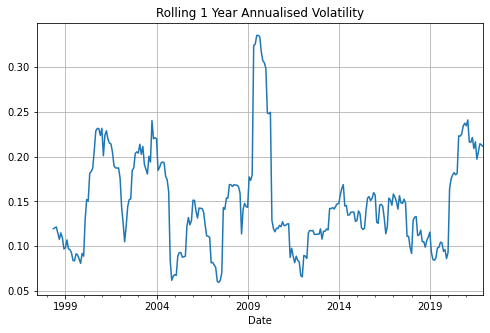

In [42]:
# Volatility
volmonthly = (momentum_strategy_returns['Strategy'].std()) * np.sqrt(12)
print ('Annualisierte Volatilität =',str(round(volmonthly,4)*100)+"%")

momentum_strategy_returns['roll12mannualisedvol'].plot(grid=True, figsize=(8,5),
title='Rolling 1 Year Annualised Volatility');

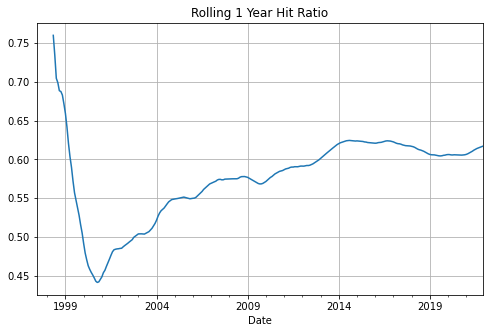

In [43]:
# Anteil der Monate mit positiver Rendite
momentum_strategy_returns['rollhitratio'].plot(grid=True, figsize=(8,5),
title='Rolling 1 Year Hit Ratio');

In [44]:
# Annualised Return; 'cagr' stands for compound, annualised gross return
days = (momentum_strategy_returns.index[-1] - momentum_strategy_returns.index[0]).days
cagr = ((((momentum_strategy_returns['Strategy Equity'][-1]) / momentum_strategy_returns['Strategy Equity'][1])) ** (365/days)) - 1
print ('CAGR =',str(round(cagr,3)*100)+"%")

CAGR = 5.7%


In [45]:
# Return der letzten 12 Monate
momentum_strategy_returns['last12mret'] = momentum_strategy_returns['Strategy'].rolling(window=12,center=False).sum()
last12mret = momentum_strategy_returns['last12mret'][-1]
print('last 12 month return =',str(round(last12mret*100,2))+"%")

last 12 month return = 51.04%


In [46]:
# Max drawdown (MDD): Ist ein Maß für den größten Preisrückgang von einem Höchststand zu einem Tiefststand.

# Erstellung der max drawdown Funktion
def max_drawdown(X):
    mdd = 0
    peak = X[0]
    for x in X:
        if x > peak: 
            peak = x
        dd = (peak - x) / peak
        if dd > mdd:
            mdd = dd
    return mdd  

mdd_monthly = max_drawdown(momentum_strategy_returns['Strategy Equity'])
print ('max drawdown =',str(round(mdd_monthly,4)*100)+"%")

max drawdown = 35.94%


In [47]:
# Best Month Performance
bestmonth = max(momentum_strategy_returns['Strategy'])
print ('Best month =',str(round(bestmonth,2)*100)+"%")
print ('Date =',str(momentum_strategy_returns['Strategy'].idxmax())[0:10])

Best month = 24.0%
Date = 2009-05-31


In [48]:
# Worst Month Performance
worstmonth = min(momentum_strategy_returns['Strategy'])
print ('Worst month =',str(round(worstmonth,2)*100)+"%")
print ('Date =',str(momentum_strategy_returns['Strategy'].idxmin())[0:10])

Worst month = -13.0%
Date = 2009-02-28


In [49]:
# % of Profitable Months & % Non-Profitable Months
positive_months = len(momentum_strategy_returns['Strategy'][momentum_strategy_returns['Strategy'] > 0])
negative_months = len(momentum_strategy_returns['Strategy'][momentum_strategy_returns['Strategy'] < 0])
flatmonths = len(momentum_strategy_returns['Strategy'][momentum_strategy_returns['Strategy'] == 0])
perc_positive_months = positive_months / (positive_months + negative_months + flatmonths)
perc_negative_months = negative_months / (positive_months + negative_months + flatmonths)
print ('% of Profitable Months =',str(round(perc_positive_months,2)*100)+"%")
print ('% of Non-profitable Months =',str(round(perc_negative_months,2)*100)+"%")

% of Profitable Months = 62.0%
% of Non-profitable Months = 38.0%
